# Waste Characterization Based on Sector

In [1]:
# Import libraries
import swolfpy_inputdata as spid

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy_financial as npf

# Set font for plots
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "14"

from IPython.display import Image

# Set specs for pandas
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 500)
pd.set_option('display.precision', 2)

### Waste fractions based on CalRecycle website
https://www2.calrecycle.ca.gov/wasteCharacterization/

In [2]:
data = pd.read_csv('Composition Categories.csv')
data.head()

,Row,Material Category,Material Type,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0,Paper,Uncoated Corrugated Cardboard,Corr_Cardboard,NaN,NaN
1,1,Paper,Paper Bags,Paper_Bags,NaN,NaN
2,2,Paper,Newspaper,Newsprint,NaN,NaN
3,3,Paper,White Ledger Paper,Office_Paper,NaN,NaN
4,4,Paper,Other Office Paper,Office_Paper,NaN,NaN


In [3]:
# Transformation of waste composition for SwolfPy
def cal_comp(DF, column):
    ps = DF[column]
    comp = pd.Series(index=spid.CommonData.Index, data=0.0)
    
    comp['Yard_Trimmings_Leaves'] = ps[40] / 2 + ps[41] / 3
    comp['Yard_Trimmings_Grass'] = ps[40] / 2 + ps[41] / 3
    comp['Yard_Trimmings_Branches'] = ps[41] / 3 + ps[42]

    comp['Food_Waste_Vegetable'] = ps[39] * 2 / 3
    comp['Food_Waste_Non_Vegetable'] = ps[39] * 1 / 3

    comp['Wood'] = ps[50] / 2 + ps[51] / 2 + ps[53] / 2
    comp['Wood_Other'] = ps[50] / 2 + ps[51] / 2 + ps[53] / 2

    comp['Textiles'] = ps[44]
    comp['Rubber_Leather'] = 0


    comp['Newsprint'] = ps[2]
    comp['Corr_Cardboard'] = ps[0]
    comp['Office_Paper'] = ps[3] + ps[4]
    comp['Magazines'] = ps[5]
    comp['Third_Class_Mail'] = ps[6] 
    comp['Folding_Containers'] = 0
    comp['Paper_Bags'] = ps[1]
    comp['Mixed_Paper'] = ps[7] + ps[9]
    comp['Paper_Non_recyclable'] = ps[8] + ps[10]



    comp['HDPE_Translucent_Containers'] = ps[29] / 2
    comp['HDPE_Pigmented_Containers'] = ps[29] / 2
    comp['PET_Containers'] = ps[28]
    comp['Plastic_Other_1_Polypropylene'] = ps[30]
    comp['Plastic_Other_2'] = 0
    comp['Mixed_Plastic'] = ps[35]
    comp['Plastic_Film'] = ps[31] + ps[32] + ps[33] + ps[34]
    comp['Plastic_Non_Recyclable'] = ps[36] + ps[37] + ps[38]


    comp['Ferrous_Cans'] = ps[17]
    comp['Ferrous_Metal_Other'] = ps[20]
    comp['Aluminum_Cans'] = ps[21]
    comp['Aluminum_Foil'] = 0
    comp['Aluminum_Other'] = ps[22]
    comp['Ferrous_Non_recyclable'] = ps[23]
    comp['Al_Non_recyclable'] = 0


    comp['Glass_Brown'] = ps[13]
    comp['Glass_Green'] = ps[12]
    comp['Glass_Clear'] = ps[11]
    comp['Mixed_Glass'] = ps[14] + ps[15]
    comp['Glass_Non_recyclable'] = ps[16]


    comp['Misc_Organic'] = ps[43] + ps[46]
    comp['Misc_Inorganic'] = 0
    comp['E_waste'] = ps[24] + ps[25] + ps[26] + ps[27]
    comp['Bottom_Ash'] = ps[62]
    comp['Fly_Ash'] = 0
    comp['Diapers_and_sanitary_products'] = 0
    
    return comp

In [4]:
comp_data = pd.read_csv('Data/Composition.csv')
comp_data.head()

,Material Category,Material Type,Multifamily,Education,Hotels,Restaurants,Retail Trade
0,Paper,Uncoated Corrugated Cardboard,5.90e-02,4.11e-02,7.46e-02,7.93e-02,5.19e-01
1,Paper,Paper Bags,5.86e-03,3.25e-03,4.17e-03,2.85e-03,8.61e-04
2,Paper,Newspaper,6.80e-02,1.28e-02,2.54e-02,2.22e-02,4.31e-03
3,Paper,White Ledger Paper,7.54e-03,5.47e-02,9.12e-03,5.95e-03,2.29e-03
4,Paper,Other Office Paper,9.13e-03,4.20e-02,1.09e-02,3.13e-03,3.59e-03


In [5]:
COM_Comp = pd.DataFrame(index=spid.CommonData.Index)
COM_Comp['MultiFamily-CA'] = cal_comp(comp_data, 'Multifamily')
COM_Comp['Education'] = cal_comp(comp_data, 'Education')
COM_Comp['Hotels'] = cal_comp(comp_data, 'Hotels')
COM_Comp['Restaurants'] = cal_comp(comp_data, 'Restaurants')
COM_Comp['Retail Trade'] = cal_comp(comp_data, 'Retail Trade')
COM_Comp.sum()

MultiFamily-CA    0.90
Education         0.96
Hotels            0.90
Restaurants       0.99
Retail Trade      0.96
dtype: float64

In [6]:
COM_Comp = COM_Comp / COM_Comp.sum()

### Composition for high food waste content commercial and institutional (HFW-CI) waste generators

In [7]:
## Estimate total mass of generated waste
population = 10**6
Mass_Education = 0.016 * population - 492.67
Mass_Hotels = 0.0039 * population + 770.16
Mass_Restaurants = 0.0549 * population - 2304.8
Mass_RetailTrade = 0.0444 * population - 396.94
Total_com_waste = Mass_Education + Mass_Hotels + Mass_Restaurants + Mass_RetailTrade

print(f'Total mass of Commercial Waste for {population} population: {Total_com_waste} tons/year')

COM_mass = (Mass_Education * COM_Comp['Education']
            + Mass_Hotels * COM_Comp['Hotels']
            + Mass_Restaurants * COM_Comp['Restaurants']
            + Mass_RetailTrade * COM_Comp['Retail Trade'])
COM_Comp['HFW-CI'] = COM_mass / COM_mass.sum()
COM_Comp.head()

Total mass of Commercial Waste for 1000000 population: 116775.75 tons/year


,MultiFamily-CA,Education,Hotels,Restaurants,Retail Trade,HFW-CI
Yard_Trimmings_Leaves,1.67e-02,0.02,0.02,1.36e-02,3.92e-03,1.13e-02
Yard_Trimmings_Grass,1.67e-02,0.02,0.02,1.36e-02,3.92e-03,1.13e-02
Yard_Trimmings_Branches,2.45e-03,0.01,0.03,1.34e-03,5.48e-05,3.40e-03
Food_Waste_Vegetable,1.65e-01,0.21,0.20,3.16e-01,2.12e-01,2.58e-01
Food_Waste_Non_Vegetable,8.24e-02,0.10,0.10,1.58e-01,1.06e-01,1.29e-01


In [8]:
print(f"""
Total_com_waste:{Total_com_waste}
Mass_Education: {Mass_Education}
Mass_Hotels: {Mass_Hotels}
Mass_Restaurants: {Mass_Restaurants}
Mass_RetailTrade: {Mass_RetailTrade}""")


Total_com_waste:116775.75
Mass_Education: 15507.33
Mass_Hotels: 4670.16
Mass_Restaurants: 52595.2
Mass_RetailTrade: 44003.06


### Residential waste composition

In [9]:
SF_Comp = pd.read_excel('Data/SF_Cmp.xlsx', sheet_name='SF_Comp', index_col=0)
COM_Comp['SingleFamily'] = SF_Comp['SingleFamily']
COM_Comp['MultiFamily'] = SF_Comp['MultiFamily']
SF_Comp.head()

,SingleFamily,MultiFamily
Yard_Trimmings_Leaves,0.04,0.01
Yard_Trimmings_Grass,0.09,0.03
Yard_Trimmings_Branches,0.06,0.02
Food_Waste_Vegetable,0.11,0.12
Food_Waste_Non_Vegetable,0.06,0.06


In [10]:
COM_Comp_grouped = pd.DataFrame(index=['Yard Waste', 'Food Waste', 'Wood', 'Paper', 'Plastic', 'Metals', 'Glass', 'Other'],
                                columns=['SingleFamily', 'MultiFamily', 'MultiFamily-CA', 'HFW-CI', 'Education', 'Hotels', 'Restaurants', 'Retail Trade'])


YardWaste =  ['Yard_Trimmings_Leaves', 'Yard_Trimmings_Grass', 'Yard_Trimmings_Branches']
FoodWaste = ['Food_Waste_Vegetable', 'Food_Waste_Non_Vegetable']
Wood = ['Wood', 'Wood_Other']
Paper = ['Newsprint', 'Corr_Cardboard', 'Office_Paper', 'Magazines', 'Third_Class_Mail',
         'Folding_Containers', 'Paper_Bags', 'Mixed_Paper', 'Paper_Non_recyclable']
Plastic = ['HDPE_Translucent_Containers', 'HDPE_Pigmented_Containers', 'PET_Containers',
           'Plastic_Other_1_Polypropylene', 'Plastic_Other_2', 'Mixed_Plastic', 'Plastic_Film',
           'Plastic_Non_Recyclable']
Metals = ['Ferrous_Cans', 'Ferrous_Metal_Other', 'Aluminum_Cans', 'Aluminum_Foil',
          'Aluminum_Other', 'Ferrous_Non_recyclable', 'Al_Non_recyclable']
Glass = ['Glass_Brown', 'Glass_Green', 'Glass_Clear', 'Mixed_Glass', 'Glass_Non_recyclable']

df = COM_Comp
for column in COM_Comp_grouped.columns:
    COM_Comp_grouped[column]['Yard Waste'] = df[column][YardWaste].sum()
    COM_Comp_grouped[column]['Food Waste'] = df[column][FoodWaste].sum()
    COM_Comp_grouped[column]['Wood'] = df[column][Wood].sum()
    COM_Comp_grouped[column]['Paper'] = df[column][Paper].sum()
    COM_Comp_grouped[column]['Plastic'] = df[column][Plastic].sum()
    COM_Comp_grouped[column]['Metals'] = df[column][Metals].sum()
    COM_Comp_grouped[column]['Glass'] = df[column][Glass].sum()
    COM_Comp_grouped[column]['Other'] = 1 - COM_Comp_grouped[column].sum()

COM_Comp_grouped.sort_values(by='HFW-CI', ascending=False, inplace=True)
COM_Comp_grouped

,SingleFamily,MultiFamily,MultiFamily-CA,HFW-CI,Education,Hotels,Restaurants,Retail Trade
Paper,0.29,0.37,0.31,0.42,0.39,0.29,0.29,0.6
Food Waste,0.17,0.17,0.25,0.39,0.31,0.31,0.47,0.32
Plastic,0.12,0.14,0.13,0.09,0.13,0.12,0.11,0.05
Glass,0.04,0.05,0.05,0.03,0.0,0.09,0.05,0.01
Yard Waste,0.19,0.06,0.04,0.03,0.06,0.07,0.03,0.01
Other,0.16,0.16,0.16,0.02,0.06,0.07,0.02,0.01
Metals,0.03,0.04,0.04,0.02,0.03,0.04,0.02,0.01
Wood,0.01,0.01,0.03,0.0,0.01,0.01,0.0,0.0


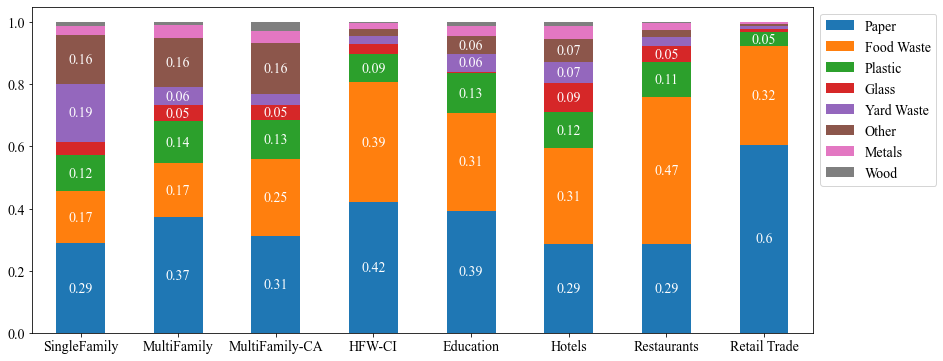

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
COM_Comp_grouped.T.plot.bar(stacked=True, ax=ax, rot=0)
ax.legend(bbox_to_anchor=(1, 1))

def frmt(x):
    res = []
    for i in x:
        if np.round(i, 2) > 0.04:
            res.append(np.round(i, 2))
        else:
            res.append('')
    return res

for c in ax.containers:
    ax.bar_label(c, label_type='center', labels=frmt(c.datavalues), fontsize=14, color='w')

In [12]:
COM_Comp_grouped.columns

Index(['SingleFamily', 'MultiFamily', 'MultiFamily-CA', 'HFW-CI', 'Education',
       'Hotels', 'Restaurants', 'Retail Trade'],
      dtype='object')

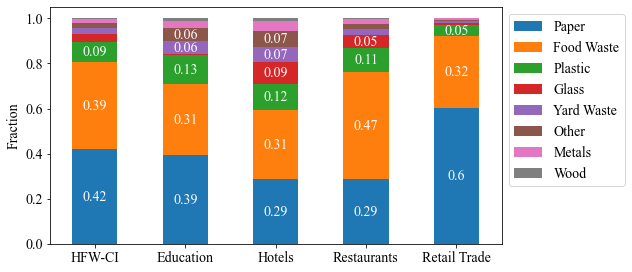

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))
COM_Comp_grouped[['HFW-CI', 'Education', 'Hotels', 'Restaurants', 'Retail Trade']].T.plot.bar(stacked=True, ax=ax, rot=0)
ax.legend(bbox_to_anchor=(1, 1))
for c in ax.containers:
    ax.bar_label(c, label_type='center', labels=frmt(c.datavalues), fontsize=14, color='w')
ax.set_ylabel('Fraction')
fig.tight_layout()
fig.savefig('HFW_CI.png', dpi=300)

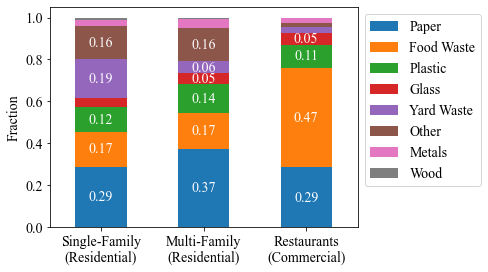

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
COM_Comp_grouped[['SingleFamily', 'MultiFamily', 'Restaurants']].T.plot.bar(stacked=True, ax=ax, rot=0)
ax.legend(bbox_to_anchor=(1, 1))

# def frmt(x):
#     res = []
#     for i in x:
#         if np.round(i, 2) > 0.04:
#             res.append(np.round(i, 2))
#         else:
#             res.append('')
#     return res

for c in ax.containers:
    ax.bar_label(c, label_type='center', labels=frmt(c.datavalues), fontsize=14, color='w')

ax.xaxis.set_ticklabels(['Single-Family\n(Residential)', 'Multi-Family\n(Residential)', 'Restaurants\n(Commercial)'])
ax.set_ylabel('Fraction')

fig.tight_layout()
fig.savefig('Composition.png', dpi=300)

In [15]:
COM_Comp

,MultiFamily-CA,Education,Hotels,Restaurants,Retail Trade,HFW-CI,SingleFamily,MultiFamily
Yard_Trimmings_Leaves,1.67e-02,2.17e-02,2.13e-02,1.36e-02,3.92e-03,1.13e-02,3.73e-02,1.16e-02
Yard_Trimmings_Grass,1.67e-02,2.17e-02,2.13e-02,1.36e-02,3.92e-03,1.13e-02,9.33e-02,2.90e-02
Yard_Trimmings_Branches,2.45e-03,1.30e-02,2.63e-02,1.34e-03,5.48e-05,3.40e-03,5.60e-02,1.74e-02
Food_Waste_Vegetable,1.65e-01,2.09e-01,2.05e-01,3.16e-01,2.12e-01,2.58e-01,1.12e-01,1.16e-01
Food_Waste_Non_Vegetable,8.24e-02,1.04e-01,1.02e-01,1.58e-01,1.06e-01,1.29e-01,5.58e-02,5.78e-02
Wood,1.38e-02,6.93e-03,5.93e-03,1.81e-03,1.60e-04,2.03e-03,5.40e-03,3.99e-03
Wood_Other,1.38e-02,6.93e-03,5.93e-03,1.81e-03,1.60e-04,2.03e-03,5.40e-03,3.99e-03
Textiles,7.32e-02,1.67e-02,2.39e-02,6.09e-03,2.44e-03,6.84e-03,5.42e-02,5.76e-02
Rubber_Leather,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
Newsprint,7.52e-02,1.33e-02,2.82e-02,2.24e-02,4.51e-03,1.47e-02,3.67e-02,5.99e-02


In [16]:
COM_Comp.to_csv('Updated Composition.csv')

# Waste Generation rate

* **Population: 1,000,000**
* MF fraction according to Wake County data: 18% of households, 23% of population
* MF fraction according to US data: 15%

In [17]:
WakeCounty = pd.read_csv('Data/WakeCounty.csv', index_col=0)
WakeCounty.T

,SF1,SF2,SF3,SF4,SF5,SF6,SF7,SF8,SF9,SF10,SF11,SF12,MF1,MF2,CC,Total
Population,34489.00,110596.00,12129.00,19811.00,26871.00,9928.00,21932.00,155000.00,4900.00,33000.00,6436.00,4493.00,100000.00,58000.00,102000.00,699585.00
Households,12036.00,45500.00,4509.00,8639.00,8640.00,3180.00,4900.00,117535.00,1481.00,10225.00,1843.00,1656.00,37175.00,21805.00,41633.00,320757.00
person/household,2.87,2.43,2.69,2.29,3.11,3.12,4.48,1.32,3.31,3.23,3.49,2.71,2.69,2.66,2.45,2.18


In [18]:
residential_type = pd.DataFrame(index=['SF', 'MF', 'CC'], columns=['Population', 'Households'])

residential_type.loc['SF', :] = WakeCounty.iloc[:12, 0:2].sum()
residential_type.loc['MF', :] = WakeCounty.iloc[12:14, 0:2].sum()
residential_type.loc['CC', :] = WakeCounty.iloc[14, 0:2]
residential_type

,Population,Households
SF,439585,220144
MF,158000,58980
CC,102000.0,41633.0


In [19]:
# Normalized
residential_type / WakeCounty.iloc[15, 0:2]

,Population,Households
SF,0.63,0.69
MF,0.23,0.18
CC,0.15,0.13


In [20]:
# person/household
person_household = residential_type['Population'] / residential_type['Households']
person_household

SF    2.0 
MF    2.68
CC    2.45
dtype: object

### Person/household

<AxesSubplot:>

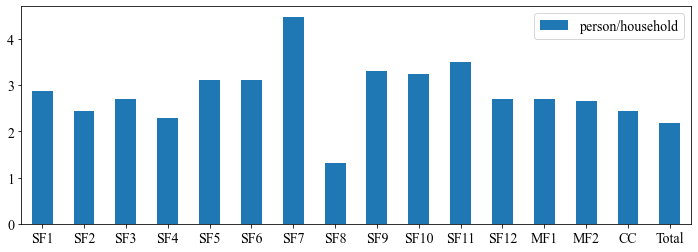

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
WakeCounty[['person/household']].plot.bar(ax=ax, rot=0)

## Waste Generation Rate

**Generation rate - US average**
* 2.22 kg/person.day

In [22]:
Gen_rate = 2.22
Total_MSW = population * Gen_rate / 1000 * 365

print(f"Total Waste: {round(Total_MSW)}\nTotal HFW-CI: {round(Total_com_waste)}")
print(f"HFW-CI fractions: {round(Total_com_waste/Total_MSW, 2)}")

Total Waste: 810300
Total HFW-CI: 116776
HFW-CI fractions: 0.14


In [23]:
## HFW-CI sector
comm_loc = 1500 # number of locations
comm_gen = Total_com_waste / 365 * 7 / comm_loc * 1000 # kg/location-week
print(f"""
HFW-CI sector
Number of locations: {comm_loc}
Generation rate: {round(comm_gen)} kg/location-week
Total waste: {round(Total_com_waste)} Mg/year""")


HFW-CI sector
Number of locations: 1500
Generation rate: 1493 kg/location-week
Total waste: 116776 Mg/year


In [24]:
## Residential sector

SF_density = 2.66
MF_density = 2.06
MF_fraction = 0.25
res_gen_rate = 1.12

print(f"""
Residentail sector
Population: {population}

Overal generation rate (US EPA average): 2.22 kg/person-day

Residentail generation rate: {res_gen_rate} kg/person-day
HFW-CI generation rate: {round(Total_com_waste * 1000 / population / 365, 2)} kg/person-day

Fraction population in Multi-Family housing: {MF_fraction}

SF: {SF_density} person/household
MF: {MF_density} person/household

N_SF: {round(population * (1 - MF_fraction) / SF_density)}
N_MF: {round(population * MF_fraction / MF_density)}
""")



Residentail sector
Population: 1000000

Overal generation rate (US EPA average): 2.22 kg/person-day

Residentail generation rate: 1.12 kg/person-day
HFW-CI generation rate: 0.32 kg/person-day

Fraction population in Multi-Family housing: 0.25

SF: 2.66 person/household
MF: 2.06 person/household

N_SF: 281955
N_MF: 121359

